In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import random
from sklearn.model_selection import ParameterGrid

## 0、数据处理成csv形式

In [250]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
          'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'income']
df = pd.read_csv('./adult.data', names=columns)
df_test_set = pd.read_csv('./adult.test', names=columns, skiprows=1) #第一行是非法数据

print(df.head())
print(df_test_set.head())
df.to_csv('./train_adult.csv', index=False)
df_test_set.to_csv('./test_adult.csv', index=False)

   age          workclass  fnlwgt   education  educationNum  \
0   39          State-gov   77516   Bachelors            13   
1   50   Self-emp-not-inc   83311   Bachelors            13   
2   38            Private  215646     HS-grad             9   
3   53            Private  234721        11th             7   
4   28            Private  338409   Bachelors            13   

         maritalStatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capitalGain  capitalLoss  hoursPerWeek   nativeCountry  income  
0         2174            0            40   United-States   <=50K  
1         

In [251]:
df_test_set.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [252]:
len(df), len(df_test_set), len(df_test_set.columns)

(32561, 16281, 15)

## 1、数据读取

In [253]:
df = pd.read_csv('./train_adult.csv')
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 2、数据预处理

### 2.1 删除对应属性

In [254]:
df.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True) # fnlwgt列用处不大，educationNum与education类似
print(df.columns)

Index(['age', 'workclass', 'education', 'maritalStatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss',
       'hoursPerWeek', 'nativeCountry', 'income'],
      dtype='object')


### 2.2 重复行记录处理

In [255]:
df.drop_duplicates(inplace=True) # 去除重复行

### 2.3 缺失值处理

In [256]:
df[df.isna().values == True] # 输出有缺失值的数据行

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income


In [257]:
df.dropna(inplace=True) # 去除空行 

### 2.4 查看列类型

In [258]:
df.dtypes

age               int64
workclass        object
education        object
maritalStatus    object
occupation       object
relationship     object
race             object
sex              object
capitalGain       int64
capitalLoss       int64
hoursPerWeek      int64
nativeCountry    object
income           object
dtype: object

### 2.5 异常值处理

In [259]:
df[df['workclass'].str.contains(r'\?', regex=True)] # 查找异常值, 避免与正则表达式的?冲突需要转义

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,10th,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,10th,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [260]:
df=df[~df['workclass'].str.contains(r'\?', regex=True)]
df

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [261]:
#删除有异常值的行
new_columns = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
               'nativeCountry', 'income']
for col in new_columns:
        df = df[~df[col].str.contains(r'\?', regex=True)]
df.head()

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.6 数据可视化，以年龄为例

<Axes: ylabel='Frequency'>

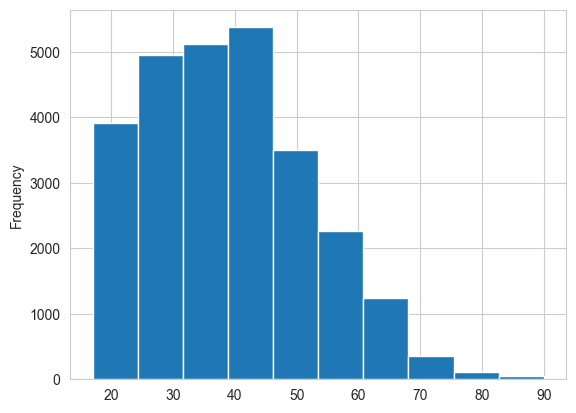

In [262]:
df['age'].plot.hist()

<Axes: xlabel='age'>

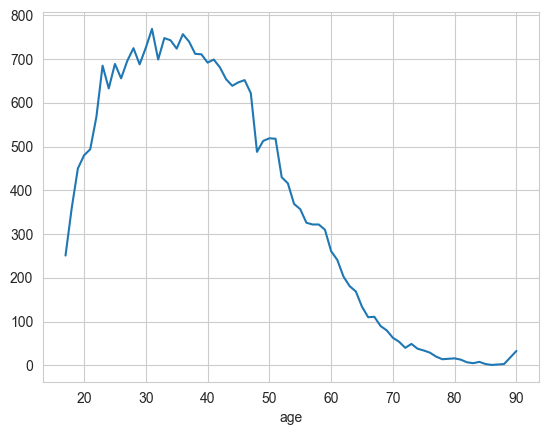

In [263]:
df['age'].value_counts().sort_index().plot(kind="line")

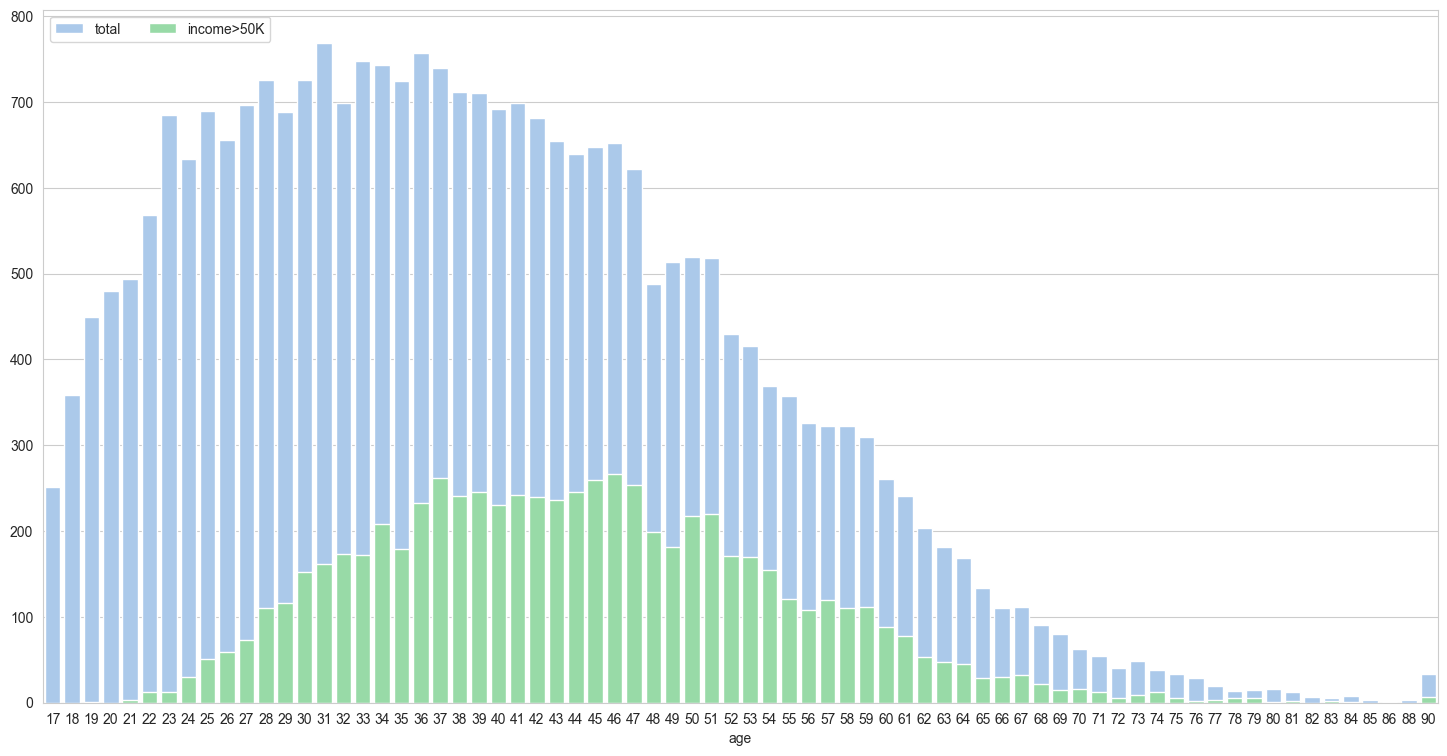

In [264]:
# 画出年龄与收入的关系
df = df.reset_index(drop=True) #重置索引
df['age'].isnull() == True
s=df['age'].value_counts()
k=df['age'][df['income']==' >50K'].value_counts()
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes("pastel")
sns.barplot(x=s.index,y=s.values,label='total',color="b")
sns.barplot(x=k.index,y=k.values,label='income>50K',color="g")
ax.legend(ncol=2, loc="upper left", frameon=True)

### 2.7 连续型变量处理

In [265]:
continuous_column = ['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek']

In [266]:
df['age'].max(), df['age'].min()

(90, 17)

In [267]:
df['age'].head() 

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [268]:
bins = [0, 25, 50, 75, 100] # 分箱区间左开右闭 (0, 25], (25, 50], ...
df['age'] = pd.cut(df['age'], bins, labels=False)

In [269]:
df['age'].head() 

0    1
1    1
2    1
3    2
4    1
Name: age, dtype: int64

### 2.8 离散型变量处理

In [270]:
discrete_column = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'income']
discrete_map = dict()

In [271]:
df['workclass'].value_counts()

workclass
 Private             19214
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: count, dtype: int64

In [272]:
df['workclass'].head() #展示前五条

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object

In [273]:
df['workclass'].value_counts().keys()

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay'],
      dtype='object', name='workclass')

In [274]:
workclass_mapping = {' Private': 0, ' Self-emp-not-inc': 1, ' Self-emp-inc': 1, ' Local-gov': 2, 
                     ' State-gov': 2, ' Federal-gov': 2, ' Without-pay': 3, ' Never-worked': 3}
df['workclass'] = df['workclass'].map(workclass_mapping)

In [275]:
df['workclass'].head()
discrete_map['workclass'] = workclass_mapping

In [276]:
for colname in discrete_column[1:]:
    print('*'*10, colname, '*'*10)
    print(df[colname].head().tolist())
    uq = pd.unique(df[colname])
    tempd = {uq[i]: i for i in range(len(uq))}
    discrete_map[colname] = tempd
    df[colname] = df[colname].map(tempd)
    print(df[colname].head().tolist())

********** education **********
[' Bachelors', ' Bachelors', ' HS-grad', ' 11th', ' Bachelors']
[0, 0, 1, 2, 0]
********** maritalStatus **********
[' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-civ-spouse', ' Married-civ-spouse']
[0, 1, 2, 1, 1]
********** occupation **********
[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Handlers-cleaners', ' Prof-specialty']
[0, 1, 2, 2, 3]
********** relationship **********
[' Not-in-family', ' Husband', ' Not-in-family', ' Husband', ' Wife']
[0, 1, 0, 1, 2]
********** race **********
[' White', ' White', ' White', ' Black', ' Black']
[0, 0, 0, 1, 1]
********** sex **********
[' Male', ' Male', ' Male', ' Male', ' Female']
[0, 0, 0, 0, 1]
********** nativeCountry **********
[' United-States', ' United-States', ' United-States', ' United-States', ' Cuba']
[0, 0, 0, 0, 1]
********** income **********
[' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K']
[0, 0, 0, 0, 0]


### 2.9将对训练集数据预处理的过程整合成一个函数
- 重新读取训练集
- 调用函数对训练集进行预处理
- 得到处理后的训练集dataframe和,连续型属性的分箱,散型属性的映射字典

In [277]:
df = pd.read_csv('./train_adult.csv')

In [278]:

def pre_porcesstraindf(df:pd.DataFrame, bincnt:int=5)->tuple[pd.DataFrame, dict, dict]:
    """
    对df(训练集合)进行预处理
    对于连续性属性，采取无监督等宽分箱
    对于离散型属性，采取将唯一值映射为数值的方法将其数值化
    Args:
        df (pd.DataFrame): _description_ 待处理的df
        bincnt (int, optional): _description_. Defaults to 5. 分箱个数

    Returns:
        tuple [pd.DataFrame, dict]: _description_ 返回处理后的dataframe和,连续型属性的分箱数组字典,散型属性的映射字典
    """
    df.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True) # fnlwgt列用处不大，educationNum与education类似
    df.drop_duplicates(inplace=True)
    df[df.isna().values == True] 
    df.dropna(inplace=True)
    new_columns = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
               'nativeCountry', 'income']
    for col in new_columns:
        df = df[~df[col].str.contains(r'\?', regex=True)]
    
    ## 连续型变量处理
    continuous_map = dict()
    continuous_column = ['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek']
    for colname in continuous_column:
        print('*'*5, colname+"分箱结果" ,'*'*5)
        max_, min_ = df[colname].max(), df[colname].min()
        bins = np.linspace(min_-1, max_+1, bincnt).tolist()
        bins.append(1e10)
        bins = [int(ele) for ele in bins]
        bins = [-1e10] + bins
        print("分箱:", bins)
        print("原始:", df[colname].head(5).to_list())
        df[colname] = pd.cut(df[colname], bins=bins, labels=False)
        print("分箱后",df[colname].head(5).tolist())
        continuous_map[colname] = bins
        
    
    ## 离散型变量处理
    discrete_column = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'income']
    discrete_map = dict()
    for colname in discrete_column:
        print('*'*5, colname, '*'*5)
        
        uq = pd.unique(df[colname])
        tempd = {uq[i]: i for i in range(len(uq))}
        discrete_map[colname] = tempd
        print("映射表", tempd)
        print("映射前", df[colname].head(5).tolist()) 
        df[colname] = df[colname].map(tempd)
        print("映射后", df[colname].head(5).tolist()) 
        
        


    ##数值化完成
    print(df.dtypes)
    display(df.head(5))
    
    return df, discrete_map, continuous_map

In [279]:
df, discrete_map, continuous_map = pre_porcesstraindf(df)

***** age分箱结果 *****
分箱: [-10000000000.0, 16, 34, 53, 72, 91, 10000000000]
原始: [39, 50, 38, 53, 28]
分箱后 [2, 2, 2, 2, 1]
***** capitalGain分箱结果 *****
分箱: [-10000000000.0, -1, 24999, 49999, 74999, 100000, 10000000000]
原始: [2174, 0, 0, 0, 0]
分箱后 [1, 1, 1, 1, 1]
***** capitalLoss分箱结果 *****
分箱: [-10000000000.0, -1, 1088, 2178, 3267, 4357, 10000000000]
原始: [0, 0, 0, 0, 0]
分箱后 [1, 1, 1, 1, 1]
***** hoursPerWeek分箱结果 *****
分箱: [-10000000000.0, 0, 25, 50, 75, 100, 10000000000]
原始: [40, 13, 40, 40, 40]
分箱后 [2, 1, 2, 2, 2]
***** workclass *****
映射表 {' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3, ' Local-gov': 4, ' Self-emp-inc': 5, ' Without-pay': 6}
映射前 [' State-gov', ' Self-emp-not-inc', ' Private', ' Private', ' Private']
映射后 [0, 1, 2, 2, 2]
***** education *****
映射表 {' Bachelors': 0, ' HS-grad': 1, ' 11th': 2, ' Masters': 3, ' 9th': 4, ' Some-college': 5, ' Assoc-acdm': 6, ' 7th-8th': 7, ' Doctorate': 8, ' Assoc-voc': 9, ' Prof-school': 10, ' 5th-6th': 11, ' 10th': 12

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,2,0,0,0,0,0,0,0,1,1,2,0,0
1,2,1,0,1,1,1,0,0,1,1,1,0,0
2,2,2,1,2,2,0,0,0,1,1,2,0,0
3,2,2,2,1,2,1,1,0,1,1,2,0,0
4,1,2,0,1,3,2,1,1,1,1,2,1,0


## 3. 构造决策树的相关函数

In [280]:
def calc_gini(df:pd.DataFrame)->float:
    """
    计算基尼指数
    Args:
        df (pd.DataFrame): _description_ 传入的df

    Returns:
        float: _description_ 根据income计算的基尼指数
    """
    cls_cnt = df['income'].value_counts()
    summary = len(df)
    gini = 1 -sum((count/summary)**2 for count in cls_cnt)
    return gini
    

def split_dataset(df:pd.DataFrame, index:str, value:int)->tuple[pd.DataFrame, pd.DataFrame]:
    """
    根据index列的值分隔df
    Args:
        df (pd.DataFrame): _description_ 待分割的df
        index (str): _description_ 列名
        value (int): _description_ 列分割值

    Returns:
        tuple(df, df): _description_ 左右两个df
    """
    left_df = df.loc[df.loc[:, index] <= value]
    right_df = df.loc[df.loc[:, index] > value]
    return left_df, right_df
    
    
def choose_best_feature_to_split(df:pd.DataFrame, columns:list[str])->tuple:
    """
    选择最佳特征进行分割
    Args:
        df (_type_): _description_
        columns (_type_): 当前df能用来分隔的列属性

    Raises:
        ValueError: _description_
        ValueError: _description_

    Returns:
        tuple: _description_ 分割的相关结果
    """
    if len(df)==0:
        raise ValueError("df is empty")
    if columns[-1] != 'income':
        raise ValueError("columns[-1] is not 'income'")
    
    best_gain = 0
    best_value = (None, None)
    best_df = (None, None)
    cur_gini = calc_gini(df)
    for index in columns[:-1]:##在出了income列的剩下的属性里进行特征选择
        for value in df.loc[:, index].unique():
            left_df, right_df = split_dataset(df, index, value)
            if len(left_df) == 0 or len(right_df) == 0:
                continue
            left_gini  = calc_gini(left_df)
            right_gini = calc_gini(right_df)
            temp_gini = (len(left_df)/len(df))*left_gini + (len(right_df)/len(df))*right_gini
            
            gain = cur_gini - temp_gini ##temp_gini变小更好，说明更趋近于在同一类
            if gain > best_gain:
                best_gain = gain
                best_value = (index, value)
                best_df = (left_df, right_df)
    return best_value, best_df, best_gain
            


def build_decision_tree(df:pd.DataFrame, columns:list[str], depth:int=None)->dict:
    """
    构建CART决策树
    Args:
        df (pd.DataFrame): _description_ 当前要构建的df
        columns (list[str]): _description_ 当前df能用来分隔的列属性
        depth (int, optional): _description_ 当前树的深度. Defaults to None.

    Returns:
        dict: _description_ 构建的决策树
    """
    # 递归结束情况1: 若当前集合的所有样本标签相等,即样本已被分"纯",则可以返回该标签值作为一个叶子节点
    global max_depth
    global min_samples_split
    global len_origin_df
    if len(df['income'].unique()) == 1:
        return df['income'].iloc[0]
    
    # 递归结束情况2: 若当前训练集的所有特征都被使用完毕,当前无可用特征但样本仍未分"纯"，则返回样本最多的标签作为结果
    if len(columns) == 1 and columns[0] == 'income':
        return df['income'].mode()[0]
    
    # 递归结束情况3: 若当前树的深度达到了最大深度，则返回样本最多的标签作为结果
    if (max_depth is not None) and depth >= max_depth:
        return df['income'].mode()[0]
    
    # 递归结束情况4: 若当前训练集的样本数小于最小分割样本数，则返回样本最多的标签作为结果
    if isinstance(min_samples_split, int) and len(df) < min_samples_split:
        return df['income'].mode()[0]
    elif isinstance(min_samples_split, float) and len(df) < int(min_samples_split*len_origin_df):
        return df['income'].mode()[0]
        
    best_value, (left_df, right_df), best_gain = choose_best_feature_to_split(df, columns.copy())
    
    index, value = best_value
    
    # 递归结束情况5: 在剩下的属性中选择，并不能够使得gini系数下降，则返回样本最多的标签作为结果
    if index is None:
        return df['income'].mode()[0]
    
    
    
    tree = {f"feature_{index}": {}}
    
    index_int = columns.index(index)
    left_cols = columns[:index_int] + columns[index_int+1:]
    right_cols = columns[:index_int] + columns[index_int+1:]
    
    tree[f"feature_{index}"][f"sep_colname"] = index
    tree[f"feature_{index}"][f"sep_value"] = value
    tree[f"feature_{index}"][f"<= {value}"] = build_decision_tree(left_df, left_cols.copy(), None if max_depth is None else depth+1)
    tree[f"feature_{index}"][f"> {value}"] = build_decision_tree(right_df, right_cols.copy(), None if max_depth is None else depth+1)
    
    # if max_depth is not None:
    #     depth -= 1
    
    return tree
    
    
    
    
def save_decision_tree(cart):
    """
    决策树的存储
    :param cart: 训练好的决策树
    :return: void
    """
    np.save('cart.npy', cart)
    
    
def load_decision_tree():
    """
    决策树的加载
    :return: 保存的决策树
    """    
    cart = np.load('cart.npy', allow_pickle=True)
    return cart.item()


### 相关参数:采用全局变量的形式实现
- max_depth(int):最大深度
- min_samples_leaf(int/float):限定每个节点分枝后子节点至少有多少个数据

与scikit-learn中参数含义基本一致

In [281]:
df_train = df.copy() #防止预处理重新来

In [282]:
max_depth:int = None
min_samples_split = 2
len_origin_df = len(df_train)

In [283]:
columns = df_train.columns.to_list()

In [284]:
cart = build_decision_tree(df_train, columns, 1)
save_decision_tree(cart)

## 4. 评估:计算分类准确率的函数

In [285]:
def classify(cart:dict, df_row:pd.Series, targettype:type)->int:
    """
    对一行df_row进行分类
    Args:
        cart (dict): _description_ 决策树
        df_row (pd.Series): _description_ 传入的一行数据
        targettype (type): _description_ 递归的终止类型

    Returns:
        int: _description_
    """
        
    while True:
        key = list(cart.keys())[0]
        sep_colname = cart[key]['sep_colname']
        sep_value = cart[key]['sep_value']
        left_df = cart[key][f'<= {sep_value}']
        right_df = cart[key][f'> {sep_value}']
        if df_row[sep_colname] <= sep_value:
            cart = left_df
        else:
            cart = right_df
        if isinstance(cart, targettype):
            break
    
    return cart
        
    
    
def predict(cart:dict, df)->list[np.int64]:
    """
    预测df中的数据
    Args:
        cart (_type_): _description_ 决策树信息
        df (_type_): _description_ 待预测数据

    Returns:
        _type_: _description_ 预测结果列表
    """
    targettype = type(df.iloc[0, -1])
    pred_list = []
    for i in range(len(df)):
        pred_label = classify(cart, df.iloc[i,:], targettype)
        if pred_label == -1:
            pred_label = random.randint(0, 1) # 防止classify执行到返回-1,但一般不会执行到返回-1
        pred_list.append(pred_label)
    return pred_list

def calc_acc(pred_list:list[np.int64], test_list:list[np.int64])->int:
    """_summary_

    Args:
        pred_list (list[np.int64]): _description_ 预测列表
        test_list (list[np.int64]): _description_ 实际列表

    Returns:
        int: _description_ 准确率
    """
    pred = np.array(pred_list)
    test = np.array(test_list)
    acc = np.sum(pred_list == test_list) / len(test_list)
    return acc


## 5.利用网格搜索在训练集上寻找最优参数
- max_depth(int)
- min_samples_leaf(int/float)

In [286]:
param_grid = {
    'max_depth': [None] + list(range(7, len(df.columns), 2)),
    'min_samples_split': [0.02, 0.1] + [2, 100]
}

number = len(param_grid['max_depth']) * len(param_grid['min_samples_split'])
number

16

In [287]:

cnt = 1
best_acc = 0
best_params = None
grid = ParameterGrid(param_grid)
bes_cart = None
for params in grid:
    print("Now checking params:", params)
    max_depth = params['max_depth']
    min_samples_split = params['min_samples_split']
    df_train = df.copy() 
    len_origin_df = len(df_train)
    columns = df_train.columns.to_list()
    cart = build_decision_tree(df_train, columns, 1)
    test_list = df_train['income'].to_numpy()
    pred_list = predict(cart, df_train)
    acc = calc_acc(pred_list, test_list)
    print( f"{cnt}/{number}" , f"acc={acc}")
    if acc > best_acc:
        best_acc = acc
        best_params = params
        bes_cart = cart
    cnt += 1
save_decision_tree(bes_cart)
print("best_acc:", best_acc)
print("best_params:", best_params)

Now checking params: {'max_depth': None, 'min_samples_split': 0.02}
1/16 acc=0.8005129348795718
Now checking params: {'max_depth': None, 'min_samples_split': 0.1}
2/16 acc=0.7930419268510259
Now checking params: {'max_depth': None, 'min_samples_split': 2}
3/16 acc=0.8085043116265239
Now checking params: {'max_depth': None, 'min_samples_split': 100}
4/16 acc=0.8032634552482902
Now checking params: {'max_depth': 7, 'min_samples_split': 0.02}
5/16 acc=0.7944915254237288
Now checking params: {'max_depth': 7, 'min_samples_split': 0.1}
6/16 acc=0.7898082069580732
Now checking params: {'max_depth': 7, 'min_samples_split': 2}
7/16 acc=0.795011894142135
Now checking params: {'max_depth': 7, 'min_samples_split': 100}
8/16 acc=0.7944915254237288
Now checking params: {'max_depth': 9, 'min_samples_split': 0.02}
9/16 acc=0.79988105857865
Now checking params: {'max_depth': 9, 'min_samples_split': 0.1}
10/16 acc=0.7925958965209634
Now checking params: {'max_depth': 9, 'min_samples_split': 2}
11/16 acc

## 6. 对测试集进行预处理并计算在测试集上的正确率

In [288]:

def pre_porcesstestdf(df:pd.DataFrame, continuous_map:dict, discrete_map:dict)->pd.DataFrame:
    """
    对df(测试集)进行预处理
    使用对训练集进行预处理的continuous_map和discrete_map
    对于连续性属性，采取无监督等宽分箱
    对于离散型属性，采取将唯一值映射为数值的方法将其数值化
    Args:
        df (pd.DataFrame): _description_ 测试集合
        continuous_map (dict): _description_ 处理训练集用到的连续型属性分箱列表
        discrete_map (dict): _description_ 处理训练集用到的离散型属性映射列表

    Raises:
        ValueError: _description_

    Returns:
        pd.DataFrame: _description_ 处理后的测试集合
    """
    df.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True) # fnlwgt列用处不大，educationNum与education类似
    df.drop_duplicates(inplace=True)
    df[df.isna().values == True] 
    df.dropna(inplace=True)
    new_columns = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
               'nativeCountry', 'income']
    for col in new_columns:
        df = df[~df[col].str.contains(r'\?', regex=True)]
    
    ## 连续型变量处理
    continuous_column = ['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek']
    for colname in continuous_column:
        # print('*'*5, colname+"分箱结果" ,'*'*5)
        bins = continuous_map[colname]
        # print("分箱:", bins)
        # print("原始:", df[colname].head(5).to_list())
        df[colname] = pd.cut(df[colname], bins, labels=False)
        # print("分箱后",df[colname].head(5).tolist())
       
    
    ## 离散型变量处理
    discrete_column = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'income']
    for colname in discrete_column:
        # print('*'*5, colname, '*'*5)
        tempd = discrete_map[colname]
        # print("映射表", tempd)
        if colname == 'income':
            df[colname] = df[colname].str[:-1]
        # print("映射前", df[colname].head(5).tolist())  
        a = pd.unique(df[colname])
        for ele in a:
            if ele not in tempd.keys():
                raise ValueError(f"{colname}列中{ele}值不存在映射表中")
        df[colname] = df[colname].map(tempd)
        # print("映射后", df[colname].head(5).tolist()) 

    ##数值化完成
    print(df.dtypes) 
    
    return df

In [289]:
df_test = pd.read_csv('./test_adult.csv')

In [290]:
df_test = pre_porcesstestdf(df_test, continuous_map, discrete_map)

age              int64
workclass        int64
education        int64
maritalStatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalGain      int64
capitalLoss      int64
hoursPerWeek     int64
nativeCountry    int64
income           int64
dtype: object


In [291]:
cart = load_decision_tree() # 加载模型

In [292]:
test_list = df_test['income'].to_numpy()
pred_list = predict(cart, df_test)

In [293]:
acc = calc_acc(pred_list, test_list)

In [298]:
print(f"模型在测试集上分类准确率:{acc:.6f}")

模型在测试集上分类准确率:0.798089
